In [30]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

In [31]:
# Configuración básica para visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el dataset
df = pd.read_csv('../data/challenge_data-18-ago.csv',sep=';', encoding="utf-8")

df.columns


Index(['title', 'abstract', 'group'], dtype='object')

In [32]:
# Mostrar las primeras 5 filas
print("Primeras 5 filas del dataset:")
print(df.head())

# Mostrar información general del dataset (tipos de datos, valores nulos)
print("\nInformación del dataset:")
df.info()

# Resumen estadístico de las columnas numéricas (si las hay)
print("\nResumen estadístico de columnas numéricas:")
print(df.describe())

Primeras 5 filas del dataset:
                                               title  \
0  Adrenoleukodystrophy: survey of 303 cases: bio...   
1  The interpeduncular nucleus regulates nicotine...   
2       guillain-barre syndrome pathways in leukemia   
3  Potential therapeutic use of the selective dop...   
4           The basal ganglia connection in epilepsy   

                                            abstract                     group  
0  Adrenoleukodystrophy ( ALD ) is a genetically ...  neurological|hepatorenal  
1  Partial lesions were made with kainic acid in ...              neurological  
2  Hypothesis: statins improves stroke outcomes v...              neurological  
3  The clinical utility of dopamine (DA) D1 recep...              neurological  
4  Background: dementia affects cardiac patients ...              neurological  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 3 columns):
 #   Column    

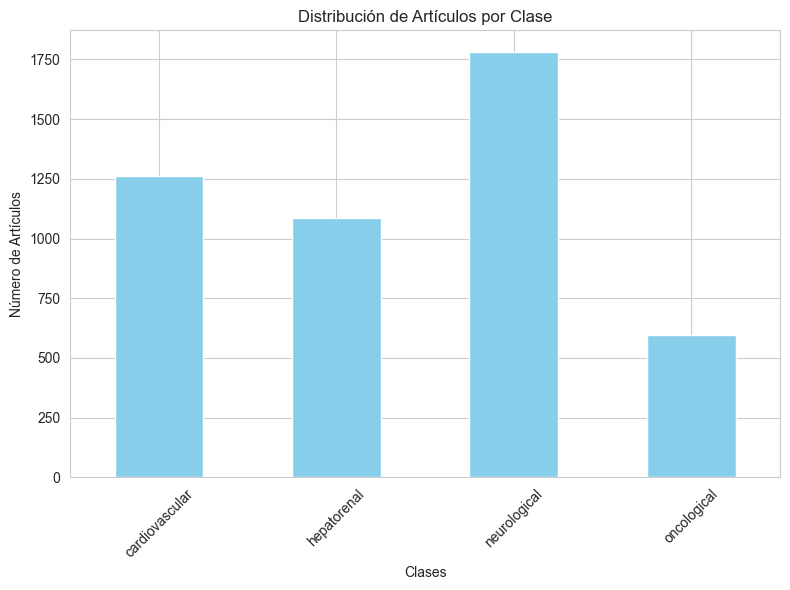

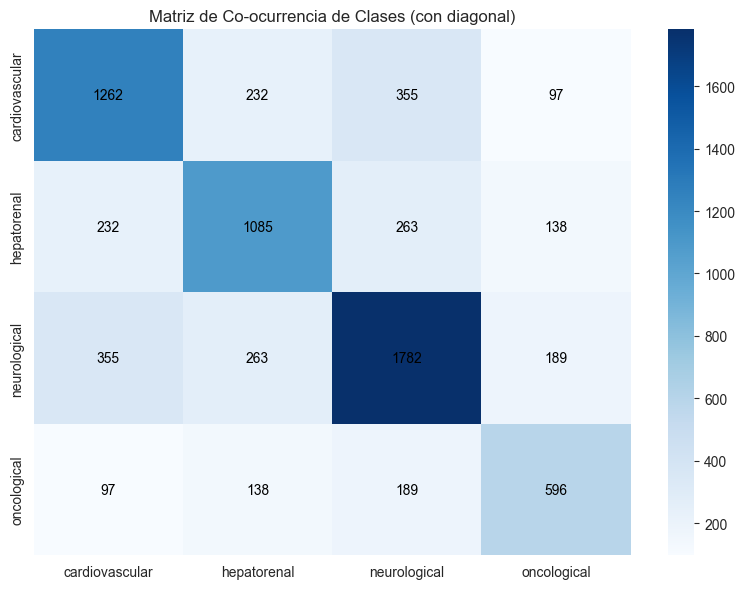

In [33]:
# --- 1. One-hot encoding de las clases ---
df_dummies = df['group'].str.get_dummies(sep='|')

# Reemplazar la columna 'group' por las dummies en el DataFrame original
df = df.drop(columns=['group']).join(df_dummies)

# --- 2. Distribución de artículos por clase ---
class_counts = df_dummies.sum()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Artículos por Clase')
plt.xlabel('Clases')
plt.ylabel('Número de Artículos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

# --- 3. Matriz de Co-ocurrencia ---
target_labels = df_dummies.columns
co_occurrence_matrix = df_dummies.T.dot(df_dummies)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(co_occurrence_matrix, cmap='Blues', cbar=True,
                 xticklabels=target_labels, yticklabels=target_labels, annot=False)

plt.title('Matriz de Co-ocurrencia de Clases (con diagonal)')

# Añadir los números manualmente en cada celda
for i in range(len(target_labels)):
    for j in range(len(target_labels)):
        ax.text(j + 0.5, i + 0.5, int(co_occurrence_matrix.iloc[i, j]),
                ha="center", va="center", color="black", fontsize=10)

plt.tight_layout()
plt.savefig('co_occurrence_matrix.png')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CRISTIAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\CRISTIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


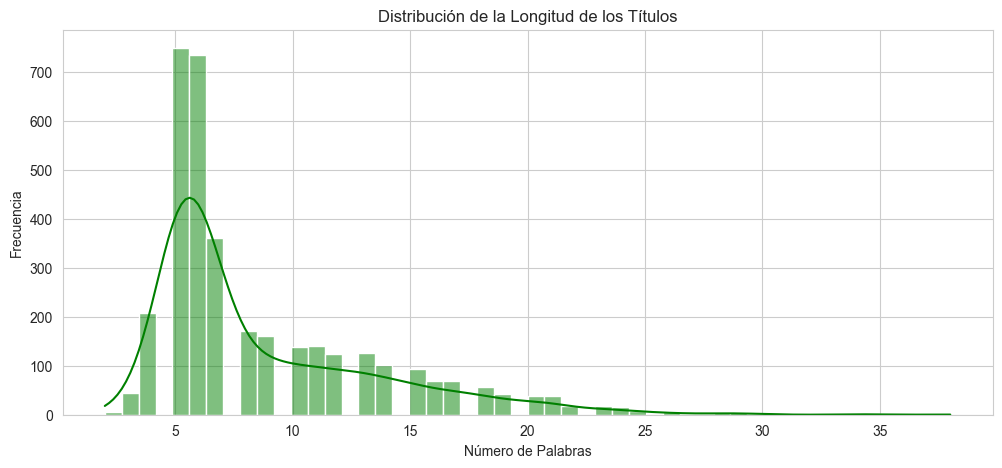

c:\Users\CRISTIAN\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


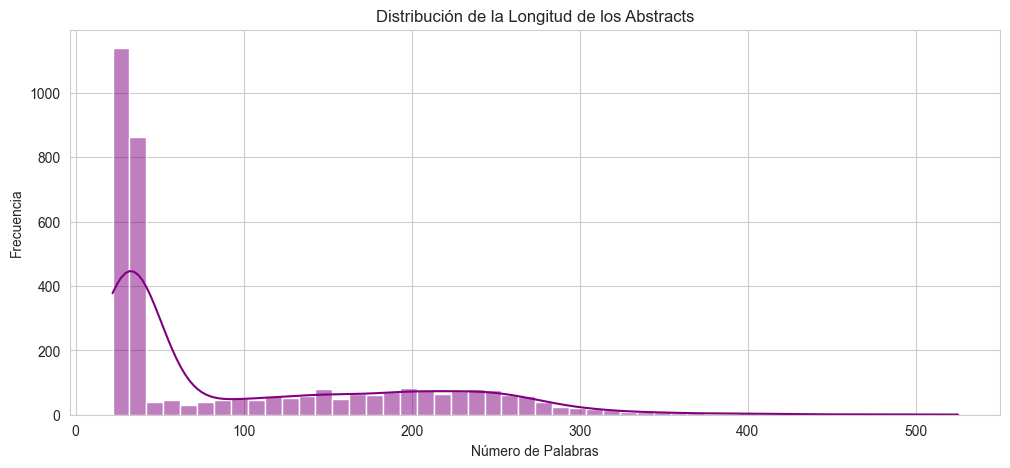

In [34]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# -------------------------
# LONGITUD DE LOS TEXTOS
# -------------------------
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))
df['abstract_length'] = df['abstract'].apply(lambda x: len(str(x).split()))

# Distribución de la longitud de los títulos
plt.figure(figsize=(12, 5))
sns.histplot(df['title_length'], bins=50, kde=True, color='green')
plt.title('Distribución de la Longitud de los Títulos')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la longitud de los abstracts
plt.figure(figsize=(12, 5))
sns.histplot(df['abstract_length'], bins=50, kde=True, color='purple')
plt.title('Distribución de la Longitud de los Abstracts')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

